In [1]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
# %%timeit -n 1
# Load your data  -- start with CreditScoring.csv... then online retail
df = pd.read_csv('./training_data_compass.csv')

In [3]:
len(df)

7214

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df.corr()

In [4]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
df.head()

In [5]:
df.head().T

,0,1,2,3,4
id,1,3,4,5,6
name,miguel_hernandez,kevon_dixon,ed_philo,marcu_brown,bouthy_pierrelouis
first,miguel,kevon,ed,marcu,bouthy
last,hernandez,dixon,philo,brown,pierrelouis
compas_screening_date,8/14/2013,1/27/2013,4/14/2013,1/13/2013,3/26/2013
sex,male,male,male,male,male
dob,4/18/1947,1/22/1982,5/14/1991,1/21/1993,1/22/1973
age,69,34,24,23,43
age_cat,greater_than_45,25_-_45,less_than_25,less_than_25,25_-_45
race,other,african-american,african-american,african-american,other


In [29]:
df = df.rename({'age': 'age_','id':'id_'}, axis=1)
type(df)
df.head().T

,0,1,2,3,4
identity,1,3,4,5,6
sex,male,male,male,male,male
age_,69,34,24,23,43
age_cat,greater_than_45,25_-_45,less_than_25,less_than_25,25_-_45
race,other,african-american,african-american,african-american,other
priors_count,0,0,4,1,2
c_charge_degree,f,f,f,f,f
priors_count.1,0,0,4,1,2
two_year_recid,0,1,1,0,0


In [6]:
df = df.drop(['start', 'end','is_violent_recid','r_jail_in','r_jail_out', 'name','first','last','is_recid',
              'event','violent_recid','in_custody','out_custody','screening_date','dob','days_b_screening_arrest',
             'type_of_assessment','compas_screening_date'], axis=1)

In [35]:
remove_this = 'priors_count.1'
~df.columns.str.contains(remove_this)
df = df[df.columns[~df.columns.str.contains(remove_this)]]
df.head().T

,0,1,2,3,4
sex,male,male,male,male,male
race,other,african-american,african-american,african-american,other
priors_count,0,0,4,1,2
c_charge_degree,f,f,f,f,f
two_year_recid,0,1,1,0,0


In [ ]:
# Categorical Values will be encoded with the Dictionary Vectorizor
# Numerical Values: At a minimum - clean the missing values and 

In [ ]:
# SKIP THIS CEL - IT IS ONLY TO REITERATE THE NEED TO CLEAN 
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced
# Obviously don't run this with your dataset
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
df = df[df.status != 'unk']   # Also make sure to treat the target variable

In [ ]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
plt.figure(figsize=(6, 4))

sns.histplot(df.two_year_recid, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('two_year_recid')
plt.title('Is two_year_recid')

plt.show()

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

In [36]:
df.head()
df.corr()

,priors_count,two_year_recid
priors_count,1.000000,0.275117
two_year_recid,0.275117,1.000000


In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df


In [ ]:
'''
# Split the data into test, train, validation sets... 60/20/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
# This splits df_train_full again so it is 60/20/20
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
len(df_train), len(df_val), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)
len(df_train),len(df_val),len(df_test)
'''

In [37]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(5771, 1443)

In [38]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.two_year_recid).values
y_test = (df_test.two_year_recid).values
del df_train_full['two_year_recid']
del df_test['two_year_recid']


In [39]:
len(y_train),len(y_test)

(5771, 1443)

In [40]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [41]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.get_feature_names_out()  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [42]:
X_test.shape

(1443, 11)

run number:  LogisticRegression(solver='liblinear')
LR: 0.640795 (0.022830)
Score for each of the 10 K-fold tests:  [0.61245675 0.64644714 0.66031196 0.60311958 0.60658579 0.65511265
 0.65684575 0.64644714 0.66897747 0.65164645]
LogisticRegression(solver='liblinear')
	Training time: 0.016s
	Prediction time: 0.144s

run number:  LinearDiscriminantAnalysis()
LDA: 0.638716 (0.021888)
Score for each of the 10 K-fold tests:  [0.60899654 0.64298094 0.65857886 0.60485269 0.61005199 0.65337955
 0.65684575 0.63604853 0.66897747 0.64644714]
LinearDiscriminantAnalysis()
	Training time: 0.155s
	Prediction time: 1.960s

run number:  KNeighborsClassifier()
KNN: 0.570609 (0.030427)
Score for each of the 10 K-fold tests:  [0.58477509 0.59792028 0.53206239 0.51993068 0.56325823 0.59272097
 0.55459272 0.62218371 0.58925477 0.54939341]
KNeighborsClassifier()
	Training time: 0.100s
	Prediction time: 0.556s

run number:  DecisionTreeClassifier()
CART: 0.626757 (0.022080)
Score for each of the 10 K-fold tes

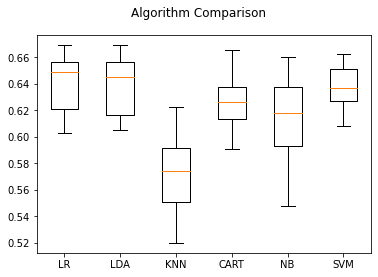

In [43]:
# Compare Algorithms
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    print("run number: ",model)
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Once you identify a single model or two - begin to investigate

In [67]:
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.get_feature_names_out())
type(dt.feature_importances_)
dv.get_feature_names_out()

array(['c_charge_degree=f', 'c_charge_degree=m', 'priors_count',
       'race=african-american', 'race=asian', 'race=caucasian',
       'race=hispanic', 'race=native_american', 'race=other',
       'sex=female', 'sex=male'], dtype=object)

In [47]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
# Rough view of the tree - hard to read but can be usable for research.  Will show a clean tree later
from sklearn.tree import export_text 
 
tree_text = export_text(dt, feature_names=dv.feature_names_) 
print(tree_text)

In [ ]:
# Drop Columns
#drop multiple columns by name
#df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)


In [70]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
y = 0
d=[]
for i,j in zip(feature_names, dt.feature_importances_):
    if j> 0:
        print('%.3f' % j, i)
    

0.026 c_charge_degree=f
0.027 c_charge_degree=m
0.742 priors_count
0.052 race=african-american
0.013 race=asian
0.033 race=caucasian
0.024 race=hispanic
0.004 race=native_american
0.020 race=other
0.015 sex=female
0.044 sex=male


In [50]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.019 c_charge_degree=f
0.033 c_charge_degree=m
0.742 priors_count
0.053 race=african-american
0.012 race=asian
0.034 race=caucasian
0.027 race=hispanic
0.004 race=native_american
0.017 race=other
0.013 sex=female
0.045 sex=male


# Confusion Matrix represent predictions vs Actuals on Test Data
The predicted data results in the below diagram could be read in the following manner given 1 represents  (positive) - obviously - this will be different if the target has more than 2 options. <br />
![image info](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.g4tLqo_z92Hk7NZ-JXdziwHaD1%26pid%3DApi&f=1)

### True Positive (TP): True positive represents the value of correct predictions of positives out of actual positive cases. 
### False Positive (FP): False positive represents the value of incorrect positive predictions. 
### True Negative (TN): True negative represents the value of correct predictions of negatives out of actual negative cases. 
## False Negative (FN): False negative represents the value of incorrect negative predictions.

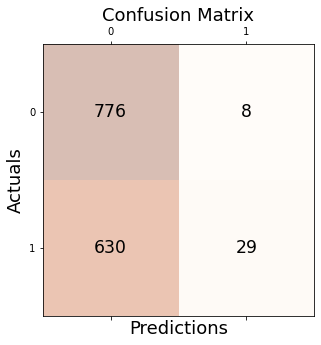

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
# y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Precision: 
Model precision score represents the model’s ability to correctly predict the positives out of all the positive predictions it made. The precision score is a useful measure of the success of prediction when the classes are very imbalanced. Mathematically, it represents the ratio of true positive to the sum of true positive and false positive.
#### Precision Score = TP / (FP + TP)

The precision score can be used in the scenario where the machine learning model is required to identify all positive examples without any false positives. For example, machine learning models are used in medical diagnosis applications where the doctor wants machine learning model will not provide a label of pneumonia if the patient does not have this disease. Oncologists want models that can identify all cancerous lesions without any false-positive results, and hence one would use a precision score in such cases.
The other example where the precision score can be useful is credit card fraud detection. In credit card fraud detection problems, classification models are evaluated using the precision score to determine how many positive samples were correctly classified by the classification model. You would not like to have a high number of false positives or else you might end up blocking many credit cards and hence a lot of frustrations with the end-users.

In [72]:
# Read this as a percentage - What proportion of positive identifications was actually correct?
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.784


## Recall: 
Model recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made. For example: If your machine learning model is trying to identify positive reviews, the recall score would be what percent of those positive reviews did your machine learning model correctly predict as a positive. In other words, it measures how good our machine learning model is at identifying all actual positives out of all positives that exist within a dataset. The higher the recall score, the better the machine learning model is at identifying both positive and negative examples. Recall score is a useful measure of success of prediction when the classes are very imbalanced.  Mathematically, it represents the ratio of true positive to the sum of true positive and false negative.
#### Recall Score = TP / (FN + TP)

Recall score can be used in the scenario where the labels are not equally divided among classes. For example, if there is a class imbalance ratio of 20:80 (imbalanced data), then the recall score will be more useful than accuracy because it can provide information about how well the machine learning model identified rarer events.

In [73]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.044


## Model accuracy:
is a machine learning model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions. For example: Let’s assume that you were testing your machine learning model with a dataset of 100 records and that your machine learning model predicted all 90 of those instances correctly. The accuracy metric, in this case, would be: (90/100) = 90%. The accuracy rate is great but it doesn’t tell us anything about the errors our machine learning models make on new data we haven’t seen before.
Mathematically, it represents the ratio of the sum of true positive and true negatives out of all the predictions.  Use this measure with extreme caution.  It can be very misleading.
#### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

In [74]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.558


## Model F1 score:
represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations). It’s often used as a single value that provides high-level information about the model’s output quality. This is a useful measure of the model in the scenarios where one tries to optimize either of precision or recall score and as a result, the model performance suffers. The following represents the aspects relating to issues with optimizing either precision or recall score:
Optimizing for recall helps with minimizing the chance of not detecting a malignant cancer. However, this comes at the cost of predicting malignant cancer in patients although the patients are healthy (a high number of FP).
Optimize for precision helps with correctness if the patient has a malignant cancer. However, this comes at the cost of missing malignant cancer more frequently (a high number of FN).
Mathematically, it can be represented as harmonic mean of precision and recall score.  Ranges from 0 to 1 and can be read as a percentage when multiplied by 100
#### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

In [75]:
# This is just for the TRUE --- Not the False
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.083


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71       784
           1       0.78      0.04      0.08       659

    accuracy                           0.56      1443
   macro avg       0.67      0.52      0.40      1443
weighted avg       0.66      0.56      0.42      1443



In [77]:
# Look to see if your target variables are balanced.  If they are NOT then consider looking at Recall and Precision
# If your target variables are balanced - then consider using accuracy as the defining metric to judge the "goodness"
df['two_year_recid'].value_counts()

0    3963
1    3251
Name: two_year_recid, dtype: int64

In [78]:
# Same info can be found in the score report
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
f1_score(y_test, y_pred, average=None)

array([0.7086758 , 0.08333333])

In [ ]:
# Evalation Metrics (really more advanced but added here for context)
# https://github.com/sepandhaghighi/pycm
# Make sure the target variables in the y_test and y_pred are exactly the same units (not 0/1 in one and True/False in the other)
!pip install pycm
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=y_test,predict_vector=y_pred)
# cm = ConfusionMatrix(y_actu, y_pred, classes=[1,0,4])
print(cm)

In [79]:
# Classification metrics - you can skip or run and print the metric you woult like to look at.
import numpy as np
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#[[1 1 3]
# [3 2 2]
# [1 3 1]]

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
# print(FP)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/((TP+FN)+.01)
# Specificity or true negative rate
TNR = TN/((TN+FP)+.01)
# Precision or positive predictive value
PPV = TP/((TP+FP)+.01)
# Negative predictive value
NPV = TN/((TN+FN)+.01)
# Fall out or false positive rate
FPR = FP/((FP+TN)+.01)
# False negative rate
FNR = FN/((TP+FN)+.01)
# False discovery rate
FDR = FP/((TP+FP)+.01)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


[[776   8]
 [630  29]]


## Take a peek at your predictions

In [80]:
# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [0 0 1 0 1 1 1 1 1 1]
The real first 10 labels [0 0 1 0 0 1 0 1 1 1]


## How to make a PREDICTION with brand new values

In [81]:
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [82]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,sex,race,priors_count,c_charge_degree
1210,male,caucasian,1,f


In [101]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[27]].to_dict('records')[0]

{'sex': 'male',
 'race': 'african-american',
 'priors_count': 0,
 'c_charge_degree': 'm'}

In [87]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(23).to_dict('records')[0]

{'sex': 'male',
 'race': 'african-american',
 'priors_count': 0,
 'c_charge_degree': 'f'}

In [102]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[27]].to_dict('records')[0]
actual = y_train[[27]]

In [103]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [104]:
model_prediction(item,dv,dt)

0

In [105]:
actual

array([0])

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

In [ ]:
# The list above can be copied into here.  Take everything after a " : " and put it in a [] so you can pass it in as a pd.DF
# create a DataFrame by transforming scalar values to list   (toggle the weekend)

myItem = {'administrative': [6],
 'administrative_duration': [94.6],
 'informational': [0],
 'informational_duration': [2.0],
 'productrelated': [15],
 'productrelated_duration': [1933.559259],
 'bouncerates': [0.005333333],
 'exitrates': [0.026377261],
 'pagevalues': [167.806338478],
 'specialday': [0.0],
 'month': ['nov'],
 'operatingsystems': [2],
 'browser': [2],
 'region': [4],
 'traffictype': [2],
 'visitortype': ['returning_visitor'],
 'weekend': [False]}

In [ ]:
newDF = pd.DataFrame.from_dict(myItem)

In [ ]:
item = newDF.to_dict('records')[0]

In [ ]:
model_prediction(item,dv,dt)

# Hyperparameter Tuning

In [106]:
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [2, 3, 4,6,8,10,20,30,40,50],'max_depth': [2, 3, 4,6,8,10,20,30,40,50],'min_samples_split': [2,4,8]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 6, 8, 10, 20, 30, 40,
                                              50],
                         'min_samples_split': [2, 4, 8]},
             verbose=1)

In [108]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

In [109]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [110]:
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
f1_score(y_test, y_pred, average=None)

array([0.70408621, 0.        ])

In [111]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.get_feature_names_out(),
 class_names=None,
 filled=True,
)

In [112]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [113]:
# You can change the params by editing the output of this and repeating the above steps.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [114]:
#Many parameters will take a very long time to load
param = { 'max_depth': [2,3,5,20,40], 
         'max_leaf_nodes': [2,20,200]}

In [115]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [116]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(dt, param, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [117]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6430392056914519
Best Hyperparameters: {'max_depth': 2, 'max_leaf_nodes': 2}
